# Clasificación y Optimización de Hiperparámetros (Core)

<strong>Objetivo:</strong> Implementar un pipeline completo de machine learning para un problema de clasificación utilizando técnicas de preprocesamiento, modelado, y optimización de hiperparámetros. Enfocar especialmente en la limpieza de datos y la optimización utilizando GridSearchCV y RandomizedSearchCV.

<strong>Dataset:</strong> [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

<strong>Descripción del Dataset:</strong> El dataset de costos médicos personales contiene información sobre varios factores que afectan los costos de seguros médicos, como la edad, el sexo, el índice de masa corporal, y el hábito de fumar. Este dataset es ideal para practicar técnicas de preprocesamiento y optimización de modelos debido a la presencia de datos sucios y variables tanto categóricas como numéricas.

## Instrucciones:

### 1. Carga y Exploración Inicial de Datos:

* Cargar el dataset desde Kaggle.
* Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
* Identificar y documentar los valores faltantes y outliers en el dataset.

### 2. Preprocesamiento de Datos:

* Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).
* Codificar variables categóricas utilizando One-Hot Encoding.
* Escalar características numéricas utilizando StandardScaler.

### 3. Implementación de Modelos de Clasificación:

* Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.
* Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

### 4. Optimización de Hiperparámetros:

* Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.
* Implementar RandomizedSearchCV como método alternativo de optimización.
* Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

### 5. Evaluación de Modelos:

* Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
* Generar y analizar la matriz de confusión para los modelos optimizados.
* Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.

### 6. Documentación y Entrega:

* Documentar todos los pasos del proceso en un notebook de Jupyter, incluyendo explicaciones detalladas y justificaciones para cada decisión tomada.
* Subir el notebook y los resultados a un repositorio de GitHub.
* Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub.

# Resolución

## 1. Carga y Exploración Inicial de Datos:

### Cargar el dataset desde Kaggle.

Descargamos el dataset.

In [1]:
from utils.git_utils import get_repo_file_path
from utils.kaggle_utils import descargar_dataset_kaggle


# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/datasets/mirichoi0218/insurance",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/insurance" (use force=True to force download)


Cargamos el dataset en un dataframe.

In [2]:
import pandas as pd


camino_ds = "../data/insurance/insurance.csv"
df = pd.read_csv(camino_ds, delimiter=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Como se puede ver, existen 7 características y 1338 filas en total en este dataset.

### Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Potencialmente existen en este dataset una columna que es booleana. Por lo que convertimos las columnas correspondientes a booleanas.

In [4]:
from utils.eda_utils import obtener_columnas

columnas = obtener_columnas(df)

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    set([0, 1]),
    set([0.0, 1.0]),
    set(["false", "true"]),
    set(["no", "yes"]),
    set(["no", "si"]),
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no"]:
        return False

    if x in [1, 1.0, "true", "yes", "si"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == posibilidad_valores_booleanos:
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'sex': ['female' 'male']
Valores de columna 'smoker': ['yes' 'no']
La columna 'smoker' es booleana. Será convertida.
Columnas convertidas a booleanas: ['smoker']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   bool   
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 64.2+ KB


Vemos los valores únicos en sex, region, para ver si se precisa convertir estas columnas a categóricas.

In [6]:
for columna in ["sex", "region"]:
    valores_unicos = df[columna].unique().tolist()
    print(f"Columnas únicas para '{columna}': {str(valores_unicos)}")

Columnas únicas para 'sex': ['female', 'male']
Columnas únicas para 'region': ['southwest', 'southeast', 'northwest', 'northeast']


Limpiamos columnas y las convertimos a categorícas.

In [7]:
from utils.eda_utils import limpiar_cadena


for columna_categorica in ["sex", "region"]:
    df[columna_categorica] = df[columna_categorica].apply(limpiar_cadena)

In [8]:
porcentaje_max_columnas_categoricas = 0.10
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []

for columna in ["sex", "region"]:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (0.1 * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}'")

    del valores_unicos

print(f"\nColumnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")

Cant. únicos para columna 'sex': 2
Valores únicos columna 'sex': ['female', 'male']
Se procede a convertir la columna 'sex' a categórica
Cant. únicos para columna 'region': 4
Valores únicos columna 'region': ['southwest', 'southeast', 'northwest', 'northeast']
Se procede a convertir la columna 'region' a categórica

Columnas convertidas a categóricas: ['sex', 'region']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   bool    
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: bool(1), category(2), float64(2), int64(2)
memory usage: 46.2 KB


#### EDA

##### Histogramas de variables numéricas.

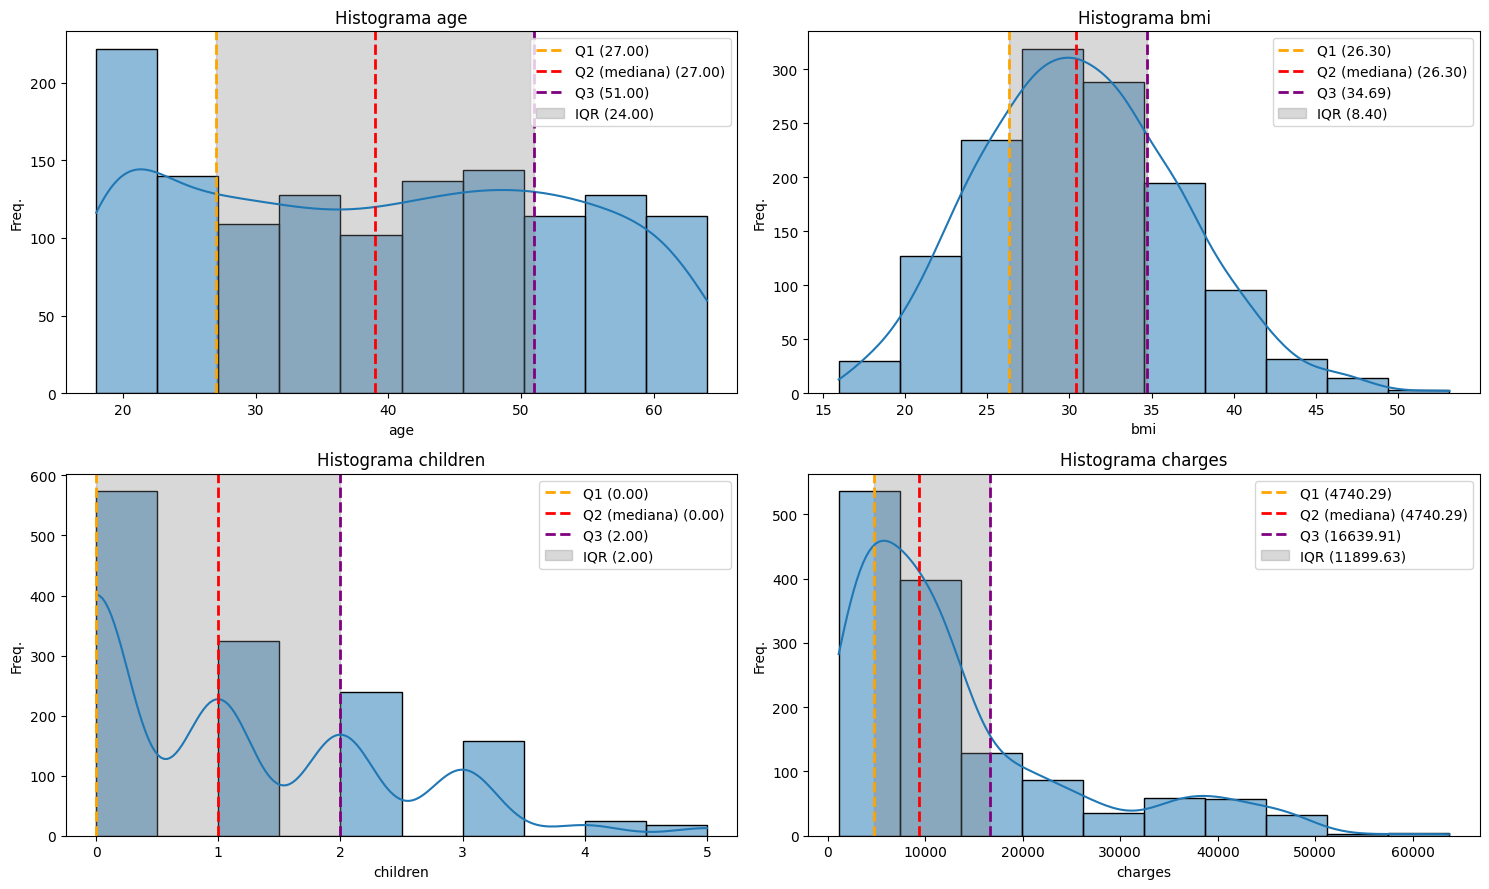

In [10]:
from utils.eda_utils import obtener_columnas_numericas_df, graficar_histogramas

columnas_numericas = obtener_columnas_numericas_df(df)

graficar_histogramas(df, columnas_numericas, kde=True, bins=10, nro_columnas=2, figsize=(15, 9))

Se puede notar de los histogramas, que la mayoría de las columnas no sigue una distribución normal.

##### Boxplots de Variables numéricas.

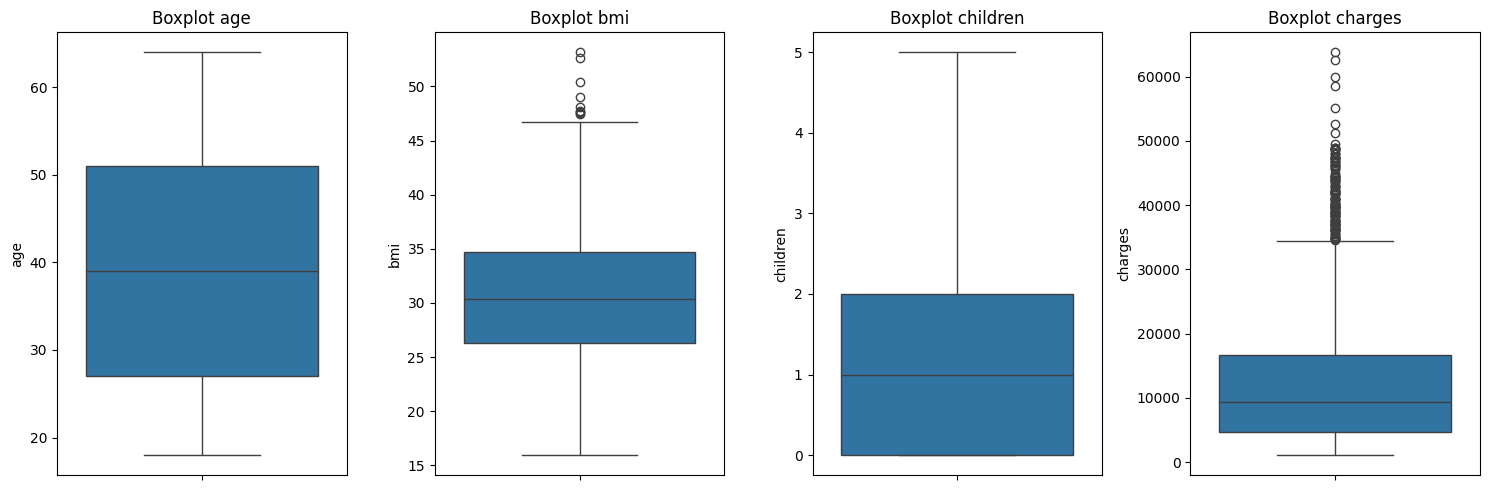

In [11]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, 4, figsize=(15, 5))

Se identifican outliers en la columna bmi. También, se encuentran muchos outliers en la columna charges. En este caso, lo ideal sería usar el RobustScaler como escalador.

##### Gráficos de dispersión vs charges.

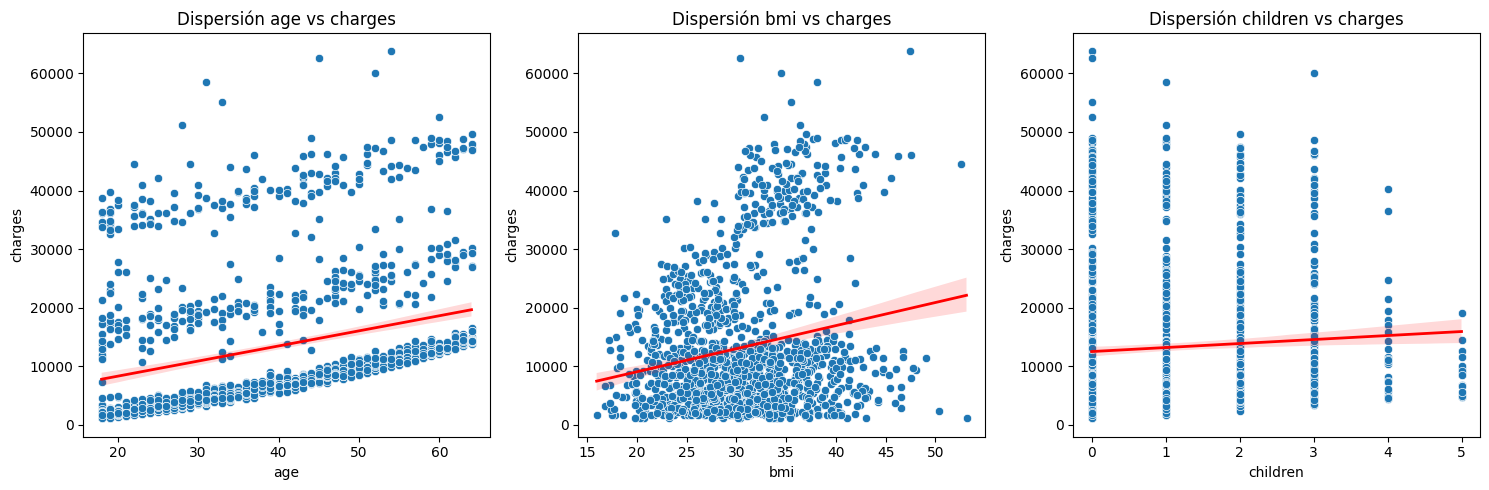

In [12]:
from utils.eda_utils import graficar_dispersiones

graficar_dispersiones(df, columnas_numericas, "charges", figsize=(15, 5))

De estos datos, podemos notar una leve correlación en las columnas, pero de igual manera existe mucha dispersión.

##### Análisis de columnas categóricas.

In [13]:
from utils.eda_utils import obtener_columnas_categoricas_df


columnas_categoricas = obtener_columnas_categoricas_df(df)
columnas_a_analizar = [*columnas_categoricas]

# Tutorial de creación de tabla de frecuencias.
# https://www.youtube.com/watch?v=UGV-GMIHLdY

for columna in columnas_a_analizar:
    print(f"Tabla de frecuencia Columna '{columna}':\n")
    crosstab_column = pd.crosstab(index=df[columna], columns="count", margins=True)
    print(crosstab_column)
    print("\n")
    print(f"Tabla de proporciones totales Columna '{columna}':\n")
    crosstab_column_perc = crosstab_column / crosstab_column.loc["All", "All"]
    print(crosstab_column_perc)
    print("\n")

Tabla de frecuencia Columna 'sex':

col_0   count   All
sex                
female    662   662
male      676   676
All      1338  1338


Tabla de proporciones totales Columna 'sex':

col_0      count       All
sex                       
female  0.494768  0.494768
male    0.505232  0.505232
All     1.000000  1.000000


Tabla de frecuencia Columna 'region':

col_0      count   All
region                
northeast    324   324
northwest    325   325
southeast    364   364
southwest    325   325
All         1338  1338


Tabla de proporciones totales Columna 'region':

col_0         count       All
region                       
northeast  0.242152  0.242152
northwest  0.242900  0.242900
southeast  0.272048  0.272048
southwest  0.242900  0.242900
All        1.000000  1.000000




Notamos de estas tablas de frecuencias que los datos están bien balanceados.

##### Gráfico de variables categóricas.

Variable sex

/tmp/ipykernel_7811/2138709287.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado_charges_cant = df.groupby("sex").count()["charges"].reset_index()


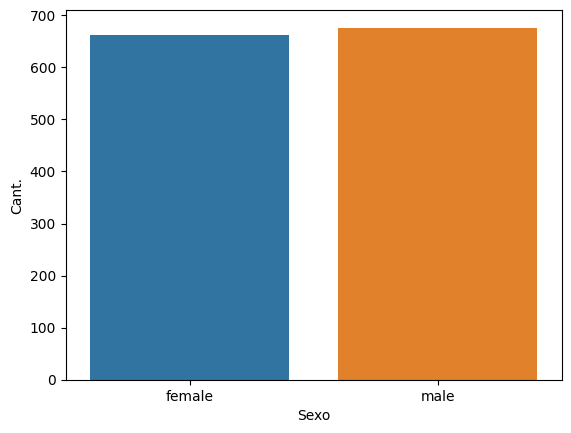

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


df_agrupado_charges_cant = df.groupby("sex").count()["charges"].reset_index()

sns.barplot(df_agrupado_charges_cant, x="sex", y="charges", hue="sex")
plt.xlabel("Sexo")
plt.ylabel("Cant.")
plt.show()

De este gráfico notamos que la cantidad de filas correspondientes a male/female en el dataset es muy similar.

/tmp/ipykernel_7811/189259295.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado_charges_promedio = df.groupby("sex")["charges"].mean().reset_index()


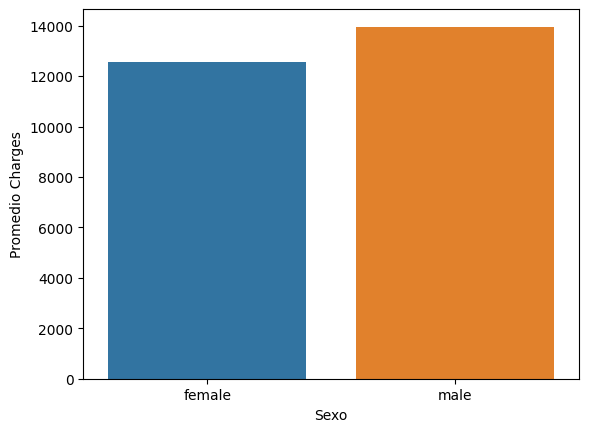

In [15]:
df_agrupado_charges_promedio = df.groupby("sex")["charges"].mean().reset_index()

sns.barplot(df_agrupado_charges_promedio, x="sex", y="charges", hue="sex")
plt.xlabel("Sexo")
plt.ylabel("Promedio Charges")
plt.show()

Podemos notar que en promedio los hombres tienen mas gastos que las mujeres.

/tmp/ipykernel_7811/1124674416.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado_charges_region_cant = df.groupby("region").count()["charges"].reset_index()


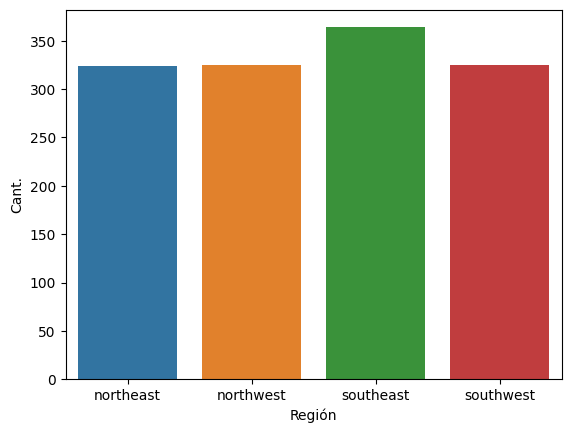

In [16]:
df_agrupado_charges_region_cant = df.groupby("region").count()["charges"].reset_index()

sns.barplot(df_agrupado_charges_region_cant, x="region", y="charges", hue="region")
plt.xlabel("Región")
plt.ylabel("Cant.")
plt.show()

Podemos notar una leve cantidad mayor de pacientes en la región southeast.

/tmp/ipykernel_7811/2889806971.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado_charges_region_promedio = df.groupby("region")["charges"].mean().reset_index()


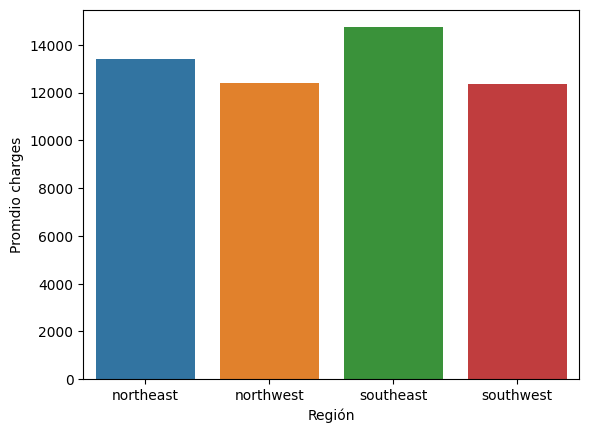

In [17]:
df_agrupado_charges_region_promedio = df.groupby("region")["charges"].mean().reset_index()

sns.barplot(df_agrupado_charges_region_promedio, x="region", y="charges", hue="region")
plt.xlabel("Región")
plt.ylabel("Promdio charges")
plt.show()

También, podemos notar de este gráfico que los pacientes tienden a gastar más en promedio.

##### Mapa de correlación entre variables.

Para graficar el mapa de correlación, se considera que el género debe convertirse a numérico para ver si existe una correlación con charges. Lo mismo con región.

In [18]:
df_one_hot_categoricas = pd.get_dummies(df, columns=["sex", "region"])

df_one_hot_categoricas

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,16884.92400,True,False,False,False,False,True
1,18,33.770,1,False,1725.55230,False,True,False,False,True,False
2,28,33.000,3,False,4449.46200,False,True,False,False,True,False
3,33,22.705,0,False,21984.47061,False,True,False,True,False,False
4,32,28.880,0,False,3866.85520,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,10600.54830,False,True,False,True,False,False
1334,18,31.920,0,False,2205.98080,True,False,True,False,False,False
1335,18,36.850,0,False,1629.83350,True,False,False,False,True,False
1336,21,25.800,0,False,2007.94500,True,False,False,False,False,True


                       age       bmi  children    smoker  sex_female  \
age               1.000000  0.109272  0.042469 -0.025019    0.020856   
bmi               0.109272  1.000000  0.012759  0.003750   -0.046371   
children          0.042469  0.012759  1.000000  0.007673   -0.017163   
smoker           -0.025019  0.003750  0.007673  1.000000   -0.076185   
sex_female        0.020856 -0.046371 -0.017163 -0.076185    1.000000   
sex_male         -0.020856  0.046371  0.017163  0.076185   -1.000000   
region_northeast  0.002475 -0.138156 -0.022808  0.002811    0.002425   
region_northwest -0.000407 -0.135996  0.024806 -0.036945    0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.068498   -0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.036945    0.004184   
charges           0.299008  0.198341  0.067998  0.787251   -0.057292   

                  sex_male  region_northeast  region_northwest  \
age              -0.020856          0.002475         -0.000407   
bmi

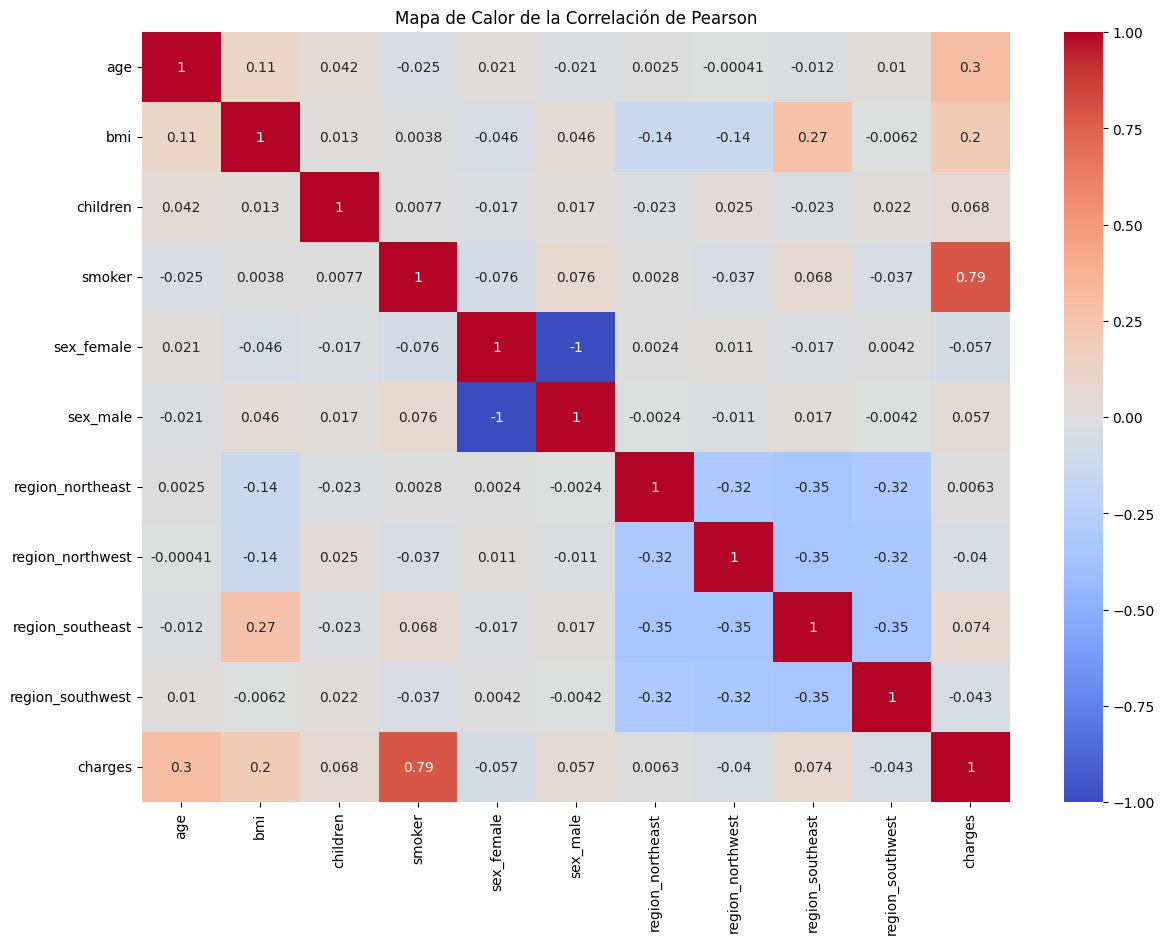

In [19]:
from utils.eda_utils import graficar_mapa_correlacion, obtener_columnas


columnas_correlacion = obtener_columnas(df_one_hot_categoricas)
columnas_correlacion.remove("charges")
columnas_correlacion += ["charges"]

graficar_mapa_correlacion(df_one_hot_categoricas, columnas_correlacion)

Del mapa de correlación, podemos notar las siguientes correlaciones con charges:

* age
* bmi
* smoker (Correlación fuerte)

Como el dataset no incluye una columna potencial de salida categórica, se crea una nueva llamada charges_range.

In [20]:
min_charges = df["charges"].min()
max_charges = df["charges"].max()

print(f"Menor cargo: {min_charges}")
print(f"Mayor cargo: {max_charges}")

Menor cargo: 1121.8739
Mayor cargo: 63770.42801


In [21]:
def _convertir_charges_a_categoria(x):
    if 0 <= x <= 10_000:
        return "0-10.000"

    if 10_000 <= x <= 20_000:
        return "10.000-20.000"

    if 20_000 <= x <= 30_000:
        return "20.000-30.000"

    if 30_000 <= x <= 40_000:
        return "30.000-40.000"

    if 40_000 <= x <= 50_000:
        return "40.000-50.000"

    return "50.000+"


df["charges_range"] = df["charges"].apply(_convertir_charges_a_categoria)

### Identificar y documentar los valores faltantes y outliers en el dataset.

#### Valores faltantes

In [22]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
age,1338,0,0.0
sex,1338,0,0.0
bmi,1338,0,0.0
children,1338,0,0.0
smoker,1338,0,0.0
region,1338,0,0.0
charges,1338,0,0.0
charges_range,1338,0,0.0


Como se puede ver, no existen datos nulos en este dataset.

#### Outliers

In [23]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
age,0.0,0.000000,-9.000000,87.000000
bmi,9.0,0.672646,13.700000,47.290000
children,0.0,0.000000,-3.000000,5.000000
charges,139.0,10.388640,-13109.150897,34489.350562


Como vimos en gráficos anteriores, hay una pequeña cantiad de outliers en bmi, y una gran cantidad de outliers en charges (10%). Se debe tener en cuenta al elegir el escalador.

## Preprocesamiento de datos.

In [24]:
columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas

['age', 'bmi', 'children', 'charges']

In [25]:
columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

['sex', 'region', 'charges_range']

In [26]:
from utils.eda_utils import obtener_columnas_booleanas_df

columnas_booleanas = obtener_columnas_booleanas_df(df)

columnas_booleanas

['smoker']

#### Selección de valores predictores y salida

In [27]:
columnas_numericas_prediccion = [
    'age',
    'bmi',
    'children',
    # 'charges',
]

columnas_categoricas_prediccion = [
    "sex",
    "region"
]

columnas_booleanas_prediccion = [
    "smoker"
]

campo_salida = "charges_range"


X = df[[*columnas_numericas_prediccion] + [*columnas_categoricas_prediccion] + [*columnas_booleanas_prediccion]]
y = df[campo_salida]

#### Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).
#### Codificar variables categóricas utilizando One-Hot Encoding.
#### Escalar características numéricas utilizando StandardScaler.

No existen valores faltants en este dataframe, por lo que no es necesario realizar este paso. De igual manera, se usa el simple imputer como ejemplo ya que no afecta en nada el proceso.

Importamos librerías requeridas

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Creamos el transformador de columnas de acuerdo a los requerimientos. Notar que se usa standard scaler de acuerdo a lo solicitado. Pero de conclusiones previas era mejor usar el RobustScaler.

In [29]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
    ("scaler", StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, columnas_numericas_prediccion + columnas_booleanas_prediccion),
    ("cat", categorical_transformer, columnas_categoricas_prediccion)
])

#### Dividir el dataset en test y train.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
    stratify=df[[*columnas_categoricas_prediccion]]
)

## 3. Implementación de Modelos de Clasificación:

#### Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.

##### Regresión Logística

In [31]:
lr = LogisticRegression(
    penalty='l2',           # Tipo de regularización L2 (Ridge)
    C=1.0,                   # Inverso de la fuerza de regularización
    solver='lbfgs',          # Algoritmo para la optimización
    max_iter=100,            # Número máximo de iteraciones
    tol=1e-4,                # Tolerancia para el criterio de parada
    random_state=42, # Semilla para la reproducibilidad
)

pipeline_lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', lr)
    ]
)

pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'smoker']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('model', LogisticRegression(random_state=42))])

##### KNN

In [32]:
X_train

,age,bmi,children,sex,region,smoker
897,19,25.555,1,male,northwest,False
767,42,29.000,1,female,southwest,False
639,56,33.660,4,male,southeast,False
604,19,28.310,0,female,northwest,True
1326,42,32.870,0,female,northeast,False
...,...,...,...,...,...,...
433,60,30.500,0,female,southwest,False
672,36,29.700,0,male,southeast,False
1054,27,21.470,0,female,northwest,False
17,23,23.845,0,male,northeast,False


In [33]:
y_train

897          0-10.000
767          0-10.000
639     10.000-20.000
604     10.000-20.000
1326         0-10.000
            ...      
433     10.000-20.000
672          0-10.000
1054         0-10.000
17           0-10.000
488     40.000-50.000
Name: charges_range, Length: 936, dtype: object

In [34]:
# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

pipeline_knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', knn)
    ]
)

pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'smoker']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('model', KNeighborsClassifier())])

##### Árbol de Decisión

In [35]:
# Entrenar el modelo Árbol de Decisión
dt = DecisionTreeClassifier(random_state=42)

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', dt)
    ]
)

pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'smoker']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

#### Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

In [36]:
score_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5).mean()
score_knn = cross_val_score(pipeline_knn, X_train, y_train, cv=5).mean()
score_dt = cross_val_score(pipeline_dt, X_train, y_train, cv=5).mean()

print(f"Promedio score Regresión Logística: {score_lr}")
print(f"Promedio score K Nearest Neighbor: {score_knn}")
print(f"Promedio score Árbol de Decisión: {score_dt}")

Promedio score Regresión Logística: 0.8205085902833087
Promedio score K Nearest Neighbor: 0.7873876436454659
Promedio score Árbol de Decisión: 0.7820116054158607


Según los resultados de la validación cruzada, el mejor modelo por el momento es el de la Regresión Logística.

## 4. Optimización de Hiperparámetros:

### Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.

#### Regresión Logística.

In [61]:
from time import time

from sklearn.model_selection import GridSearchCV


pipeline_lr_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            LogisticRegression(
                max_iter=10000,            # Número máximo de iteraciones
                tol=1e-4,                # Tolerancia para el criterio de parada
                random_state=42 # Semilla para la reproducibilidad
            ),
            param_grid={
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

inicio = time()


pipeline_lr_gscv.fit(X_train, y_train)

fin = time()

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, sol

In [62]:
duracion = fin - inicio
print(f"Duración del Proceso en segundos: {duracion}")

Duración del Proceso en segundos: 14.056620597839355


In [63]:
params = pipeline_lr_gscv.steps[-1][1].best_params_

params

{'C': 1000, 'solver': 'lbfgs'}

In [64]:
score_lr_gscv = cross_val_score(pipeline_lr_gscv, X_train, y_train, cv=5).mean()

print(f"Promedio score Regresión Logística GridSearchCv: {score_lr_gscv}")

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, sol

##### KNN

In [68]:
pipeline_knn_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            KNeighborsClassifier(),
            param_grid={
                'n_neighbors': list(range(1, 101)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

inicio = time()


pipeline_knn_gscv.fit(X_train, y_train)

fin = time()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END .....................................

In [69]:
duracion = fin - inicio
print(f"Duración del Proceso en segundos: {duracion}")

Duración del Proceso en segundos: 12.047916889190674


In [ ]:
params = pipeline_knn_gscv.steps[-1][1].best_params_

params

In [73]:
score_knn_gscv = cross_val_score(pipeline_knn_gscv, X_train, y_train, cv=5).mean()

print(f"Promedio score KNN GridSearchCv: {score_knn_gscv}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END .....................................

In [81]:
pipeline_dt_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            DecisionTreeClassifier(),
            param_grid={
                'max_depth': list(range(1, 20)) + [None],
                'min_samples_split': list(range(2, 11)),
                'min_samples_leaf': list(range(1, 5)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

inicio = time()


pipeline_dt_gscv.fit(X_train, y_train)

fin = time()

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_

In [82]:
duracion = fin - inicio
print(f"Duración del Proceso en segundos: {duracion}")

Duración del Proceso en segundos: 24.918476104736328


In [83]:
params = pipeline_dt_gscv.steps[-1][1].best_params_

params

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [ ]:
score_dt_gscv = cross_val_score(pipeline_dt_gscv, X_train, y_train, cv=5).mean()

print(f"Promedio score dt GridSearchCv: {score_dt_gscv}")

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_

##### Implementar RandomizedSearchCV como método alternativo de optimización.

##### Regresión Logística.

In [92]:
from sklearn.model_selection import RandomizedSearchCV


pipeline_lr_rscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomizedSearchCV(
            LogisticRegression(
                max_iter=10000,            # Número máximo de iteraciones
                tol=1e-4,                # Tolerancia para el criterio de parada
                random_state=42 # Semilla para la reproducibilidad
            ),
            param_distributions={
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            },
            n_iter=50,
            scoring='accuracy',
            cv=5,
            n_jobs=-1,
            random_state=42,
            refit=True,
            verbose=2,
        )),
    ]
)

inicio = time()


pipeline_lr_rscv.fit(X_train, y_train)

fin = time()

/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 35 is smaller than n_iter=50. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.1s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.1s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, sol

In [93]:
duracion = fin - inicio
print(f"Duración del Proceso en segundos: {duracion}")

Duración del Proceso en segundos: 8.19727611541748


In [96]:
params = pipeline_lr_rscv.steps[-1][1].best_params_

params

{'solver': 'lbfgs', 'C': 1000}

Por más de que el random search es aleatorio igual llegó al mismo resultado y con un tiempo mucho menor.

In [ ]:
score_lr_rscv = cross_val_score(pipeline_lr_rscv, X_train, y_train, cv=5).mean()

print(f"Promedio score dt RandomSearchCv: {score_lr_rscv}")

/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 35 is smaller than n_iter=50. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.1s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.1s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, sol

/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 35 is smaller than n_iter=50. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.001, solver=sag; total time=   0.0s
[CV] END ...................

/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 35 is smaller than n_iter=50. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.001, solver=sag; total time=   0.0s
[CV] END ................................C=0.001, solver=sag; total time=   0.0s
[CV] END ................................C=0.001, solver=sag; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.001, solver=sag; total time=   0.0s
[CV] END ...............................C=0.001, solver=saga; total time=   0.0s
[CV] END ...................

/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 35 is smaller than n_iter=50. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ...............................C=0.001, solver=saga; total time=   0.0s
[CV] END ...............................C=0.001, solver=saga; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END .................................C=0.01, solver=sag; total time=   0.0s
[CV] END ...................

/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 35 is smaller than n_iter=50. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.001, solver=sag; total time=   0.0s
[CV] END ................................C=0.001, solver=sag; total time=   0.0s
[CV] END ...................

##### KNN

In [98]:
pipeline_knn_rscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomizedSearchCV(
            KNeighborsClassifier(),
            param_distributions={
                'n_neighbors': list(range(1, 101)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

inicio = time()


pipeline_knn_rscv.fit(X_train, y_train)

fin = time()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................................n_neighbors=61; total time=   0.0s
[CV] END .....................................n_neighbors=61; total time=   0.0s
[CV] END .....................................n_neighbors=61; total time=   0.0s
[CV] END .....................................n_neighbors=61; total time=   0.0s
[CV] END .....................................n_neighbors=61; total time=   0.0s
[CV] END .....................................n_neighbors=47; total time=   0.0s
[CV] END .....................................n_neighbors=47; total time=   0.0s
[CV] END .....................................n_neighbors=47; total time=   0.0s
[CV] END .....................................n_neighbors=47; total time=   0.0s
[CV] END .....................................n_neighbors=47; total time=   0.0s
[CV] END .....................................n_neighbors=88; total time=   0.0s
[CV] END .....................................n_

In [101]:
duracion = fin - inicio
print(f"Duración del Proceso en segundos: {duracion}")

Duración del Proceso en segundos: 1.539503812789917


In [102]:
params = pipeline_knn_rscv.steps[-1][1].best_params_

params

{'n_neighbors': 34}

In [ ]:
score_knn_rscv = cross_val_score(pipeline_knn_rscv, X_train, y_train, cv=5).mean()

print(f"Promedio score dt RandomSearchCv: {score_knn_rscv}")

Fitting 5 folds for each of 35 candidates, totalling 175 fits


/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 35 is smaller than n_iter=50. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ...................

/home/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 35 is smaller than n_iter=50. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ...............................C=0.001, solver=saga; total time=   0.0s
[CV] END ................................C=0.001, solver=sag; total time=   0.0s
[CV] END ...............................C=0.001, solver=saga; total time=   0.0s
[CV] END ...............................C=0.001, solver=saga; total time=   0.0s
[CV] END ...............................C=0.001, solver=saga; total time=   0.0s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.0s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.0s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.0s
[CV] END ...................